<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Вам предстоит предсказать судьбу пассажиров Титаника. Используйте классический датасет с Kaggle: 
# Titanic: Machine Learning from Disaster | Kaggle (либо возьмите его из Seaborn) и постройте бинарный классификатор (любой). 
# Суть задания - попробовать разные фичи, предобработать имеющиеся, создать новый, попрактиковаться в работе с данными.

# Используйте 10% от train.csv в качестве тестовой части и делитесь своими результатами!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import math
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.impute import KNNImputer                   # KNN
from sklearn.linear_model import LogisticRegression     # LogReg
from sklearn import svm                                 # SVM

In [ ]:
titanic = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
TRAIN_TEST_RATIO = 0.8
train_number = round(titanic.shape[0] * TRAIN_TEST_RATIO)

train = titanic[:train_number]
test = titanic[train_number:]
# print(train, test)

In [ ]:
sur__ = train[["Age","Fare","Pclass","Survived"]].dropna()

# sur_s = train[train['Survived'] == 1]
# sur_n = train[train['Survived'] == 0]

# sur_s = sur_s[["Age","Fare"]]
# sur_n = sur_n[["Age","Fare"]]

data_AF = sur__[["Age","Fare"]]
data_AC = sur__[["Age","Pclass"]]
data_CF = sur__[["Fare","Pclass"]]
data_AF = data_AF.values
data_AC = data_AC.values
data_CF = data_CF.values

target = sur__[["Survived"]]
target = target.values

In [ ]:
def closeToHeart(A, B):
    sur_x_avr = A[A["Age"]].mean
    sur_y_avr = A[A["Fare"]].mean
    ded_x_avr = B[B["Age"]].mean
    ded_y_avr = B[B["Fare"]].mean

    print(sur_x_avr,sur_y_avr)
    # if ( (X[0] - sur_x_avr)**2 + (X[1] - sur_y_avr)**2 )**0.5 >= ( (X[0] - ded_x_avr)**2 + (X[1] - ded_y_avr)**2 )**0.5:
    #     print("ded")
    # else: 
    #     print("sur") 

In [ ]:
# AF, AC, CF
# X = data_AF
# X = data_AC
X = data_CF
Y = target

# Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1e5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


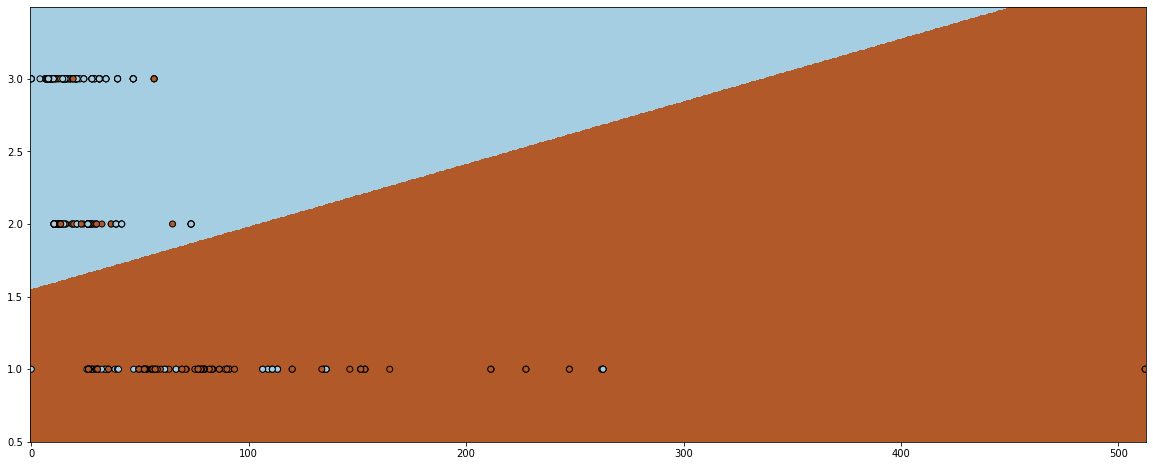

In [ ]:
logreg.fit(X, Y)
    
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
h = .005

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(20,8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

# Support Vector Machines

In [ ]:
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x = [26, 186]
closeToHeart(sur_t, sur_n)

In [ ]:
   
Y = [
     [1,1],
     [2,2],
     [8,8],
     [np.nan,np.nan] 
    ]
    
imputer = KNNImputer(n_neighbors=2)
YY = imputer.fit_transform(Y)
YY.mean()
# plt.scatter(YY[0],YY[1])

3.6666666666666665